In [1]:
from astropy.io import fits as fits
import matplotlib.pyplot as plt
import numpy as np
from photutils import DAOStarFinder

ModuleNotFoundError: No module named 'photutils'

In [2]:
def averaging (path, x, y, type, total_frames):
    
    comb = np.zeros((x,y))
    
    for j in range(total_frames):
        comb += fits.getdata(path + type + '_' + str(j+1) + '.fit')
        
    avg = comb/total_frames
    
    return avg

In [3]:
frames_in_set = 10
object_sets = 12
star_sets = 6
dark_sets = 7

object_frames = object_sets * frames_in_set
star_frames = star_sets * frames_in_set
dark_frames = dark_sets * frames_in_set
flat_frames = 40

x = 1039
y = 1391

path_raw = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Initial_Frames/'
path_clean = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Cleaned_Frames/'
path_comb = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Combined_Frames/'

In [46]:
# Takes an average of all the dark and flat frames

avg_dark = averaging(path_raw, x, y, 'dark', dark_frames)
avg_flat = averaging(path_raw, x, y, 'flat', flat_frames)

In [49]:
# Removes the average dark frame from all the asteroid and star frames

for j in range(object_frames):
    with fits.open(path_raw + 'object' + '_' + str(j+1) + '.fit') as hdul:
        data = (hdul[0].data)/1.0
        data -= avg_dark
        hdul.writeto(path_clean + 'object' + '_' + str(j+1) + '.fit')
    if (j+1) % 10 == 0:
        print('Object ' + str(j+1))
    
for j in range(star_frames):
    with fits.open(path_raw + 'star' + '_' + str(j+1) + '.fit') as hdul:
        data = (hdul[0].data)/1.0
        data -= avg_dark
        hdul.writeto(path_clean + 'star' + '_' + str(j+1) + '.fit')
    if (j+1) % 10 == 0:
        print('Star ' + str(j+1))

Object 10
Object 20
Object 30
Object 40
Object 50
Object 60
Object 70
Object 80
Object 90
Object 100
Object 110
Object 120
Star 10
Star 20
Star 30
Star 40
Star 50
Star 60


In [53]:
# Group the asteroid and star frames into combinations of 10 frames each

for j in range(object_sets):
    comb = np.zeros((x,y))
    for k in range(frames_in_set):
        with fits.open(path_clean + 'object' + '_' + str(j*frames_in_set+k+1) + '.fit') as hdul:
            data = hdul[0].data
            comb += data
    image = comb / frames_in_set
    hdu = fits.PrimaryHDU(image)
    hdu.writeto(path_comb + 'object' + '_' + str(j+1) + '.fit')
    
for j in range(star_sets):
    comb = np.zeros((x,y))
    for k in range(frames_in_set):
        with fits.open(path_clean + 'star' + '_' + str(j*frames_in_set+k+1) + '.fit') as hdul:
            data = hdul[0].data
            comb += data
    image = comb / frames_in_set
    hdu = fits.PrimaryHDU(image)
    hdu.writeto(path_comb + 'star' + '_' + str(j+1) + '.fit')

In [ ]:
# Analyse the combined frames to extract their brightness



In [17]:
data = fits.getdata(path_raw + "object_1.fit")
print(data)
print(data[0])
print(data[0,0])
print(data[1,0])

sum = 0
for j in range(x):
    sum += data[0,j]
    
print(sum)
print(data[0].size)

[[1287 1386 1324 ... 1368 1520  276]
 [1453 1440 1369 ... 1322 1458  287]
 [1433 1581 1396 ... 1360 1381  282]
 ...
 [1453 1348 1404 ... 1449 1535  291]
 [1371 1281 1284 ... 1397 1510  284]
 [1364 1365 1443 ... 1405 1520  259]]
[1287 1386 1324 ... 1368 1520  276]
1287
1453
1440336
1391


In [43]:
with fits.open(path_raw + 'object_1.fit') as hdul:
    hdul.info()
    data = hdul[0].data
    print(data)
    print(data.shape)
    data = data/1.0
    print(data)
    hdul.writeto('aaaaaaa.fit')

Filename: C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Initial_Frames/object_1.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   (1391, 1039)   int16 (rescales to uint16)   
[[1287 1386 1324 ... 1368 1520  276]
 [1453 1440 1369 ... 1322 1458  287]
 [1433 1581 1396 ... 1360 1381  282]
 ...
 [1453 1348 1404 ... 1449 1535  291]
 [1371 1281 1284 ... 1397 1510  284]
 [1364 1365 1443 ... 1405 1520  259]]
(1039, 1391)
[[1287. 1386. 1324. ... 1368. 1520.  276.]
 [1453. 1440. 1369. ... 1322. 1458.  287.]
 [1433. 1581. 1396. ... 1360. 1381.  282.]
 ...
 [1453. 1348. 1404. ... 1449. 1535.  291.]
 [1371. 1281. 1284. ... 1397. 1510.  284.]
 [1364. 1365. 1443. ... 1405. 1520.  259.]]


In [44]:
path2 = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/'
with fits.open(path2 + 'aaaaaaa.fit') as hdul:
    print(hdul[0].data)

[[1287 1386 1324 ... 1368 1520  276]
 [1453 1440 1369 ... 1322 1458  287]
 [1433 1581 1396 ... 1360 1381  282]
 ...
 [1453 1348 1404 ... 1449 1535  291]
 [1371 1281 1284 ... 1397 1510  284]
 [1364 1365 1443 ... 1405 1520  259]]


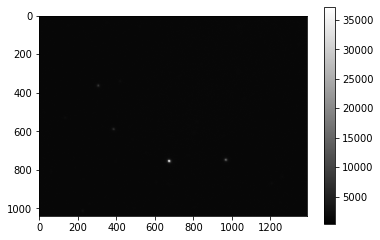

In [19]:
data = fits.getdata(path_comb + 'object_1.fit')
plt.figure()
plt.imshow(data, cmap = 'gray')
plt.colorbar()